<a href="https://colab.research.google.com/github/ccxlxy/Coding/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
wine=load_wine()

In [ ]:
import pandas as pd
winepd=pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
winepd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [ ]:
clf=tree.DecisionTreeClassifier(criterion="entropy",
                random_state=30,
                splitter="random", # 随机划分
                max_depth=3,
                # min_samples_leaf=10, # 分支后节点至少含有的训练样本数
                # min_samples_split=10  # 至少含有训练样本数才允许分支
                ) 
clf=clf.fit(Xtrain,Ytrain)  # Ytrain对应target
score=clf.score(Xtest,Ytest)

score

0.9259259259259259

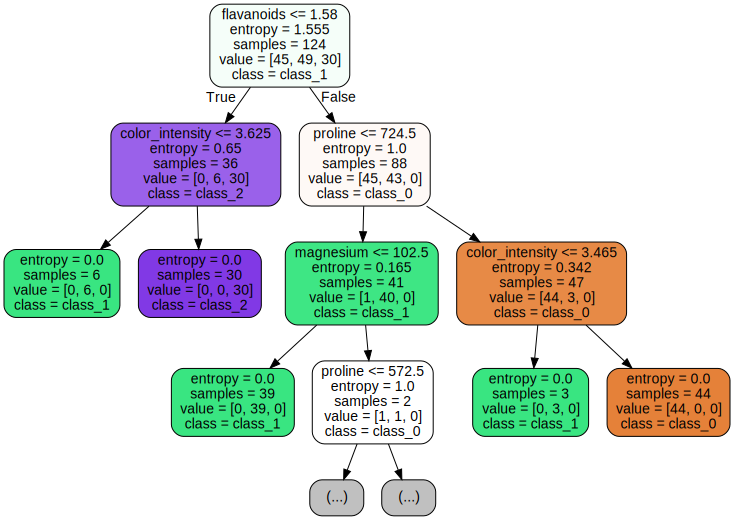

In [ ]:
import graphviz
dot_data=tree.export_graphviz(clf,
               out_file=None,
              #  max_depth=3, # 显示的层数，不是构造时的层数
               feature_names=wine.feature_names,
               class_names=wine.target_names,
               filled=True, # 填充色
               rounded=True  # 原角
              )

graph=graphviz.Source(dot_data)
graph

In [ ]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.02479789,
       0.        , 0.42254313, 0.        , 0.        , 0.20479476,
       0.        , 0.        , 0.34786422])

In [ ]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.10395162638817985),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.03988390926478045),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.49126476592816576),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.16130407598199425),
 ('proline', 0.2035956224368797)]

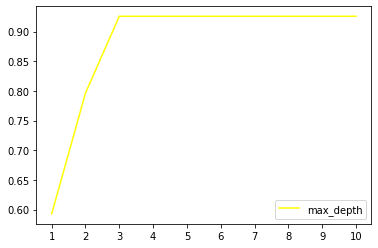

In [ ]:
# 确认最优剪枝参数
import matplotlib.pyplot as plt

test=[]
for i in range(10):
  clf=tree.DecisionTreeClassifier(criterion="entropy",
                  max_depth=i+1,
                  random_state=30,
                  splitter="random",
                  )
  clf.fit(Xtrain,Ytrain)
  score=clf.score(Xtest,Ytest)
  test.append(score)

fig,ax=plt.subplots()
ax.plot(range(1,11),test,color="yellow",label="max_depth")
ax.set_xticks(range(1,11)) # 标尺是一个列表 
plt.legend() # 显示图例
plt.show()  # 显示图像

In [ ]:
clf.apply(Xtest) # 返回每个测试样本所在叶子结点的索引

array([13, 17,  5,  5, 13, 17, 17, 11,  8,  5, 11,  5, 17, 17,  3,  3, 17,
        8, 17, 11,  5, 11,  5, 17, 11, 17, 11, 11, 11, 17, 13,  5, 17, 11,
        5, 11,  5,  5, 17,  5, 13,  8, 11, 17,  5,  5, 17,  5, 11, 17,  5,
        5,  8,  8])

In [ ]:
clf.predict(Xtest)  # 返回每个测试样本的分类/回归结果

array([1, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1,
       2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0,
       2, 2, 0, 2, 1, 0, 2, 2, 2, 2])